## Shot noise

##### from Wikipedia

For large numbers, the Poisson distribution approaches a normal distribution about its mean, and the elementary events (photons, electrons, etc.) are no longer individually observed, typically making shot noise in actual observations indistinguishable from true Gaussian noise. Since the standard deviation of shot noise is equal to the square root of the average number of events N, the signal-to-noise ratio (SNR) is given by:

$SNR=\sqrt{N}$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from helpersmd import getRandomND,harm
from plotmd import plotVector,plot2D

- Create harmonic signal

$x(t)=A\sin(2\pi ft)$

- Generate random noise signal

noise : random signal

- Add the two signals to form noisy harmonic signal

$y(t)=x(t)+noise$

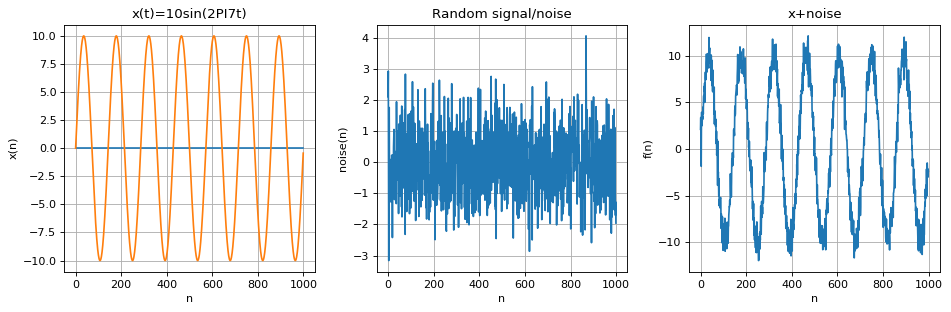

In [2]:
N=1000
dt=0.001
# 100sin(2PI53t)
A=10
f=7

xk,desc1=harm(A,f,dt,N)
noise=getRandomND(N)
yk=xk+noise

plt.figure(1,figsize=(12, 4), dpi=80)
plt.subplot(131)
plt.plot([0,1000],[0,0])
plotVector(xk,"x(t)="+desc1,"n","x(n)")
plt.subplot(132)
plotVector(noise,"Random signal/noise","n","noise(n)")
plt.subplot(133)
plotVector(yk,"x+noise","n","f(n)")
plt.tight_layout()
plt.show()

If the number of channels is N , plot signal at different values of N .

std 1 = 0.980034973109
std 10 = 0.321800609956
std 100 = 0.0979362645294
std 1000 = 0.0297191581239
std 10000 = 0.00981321860681


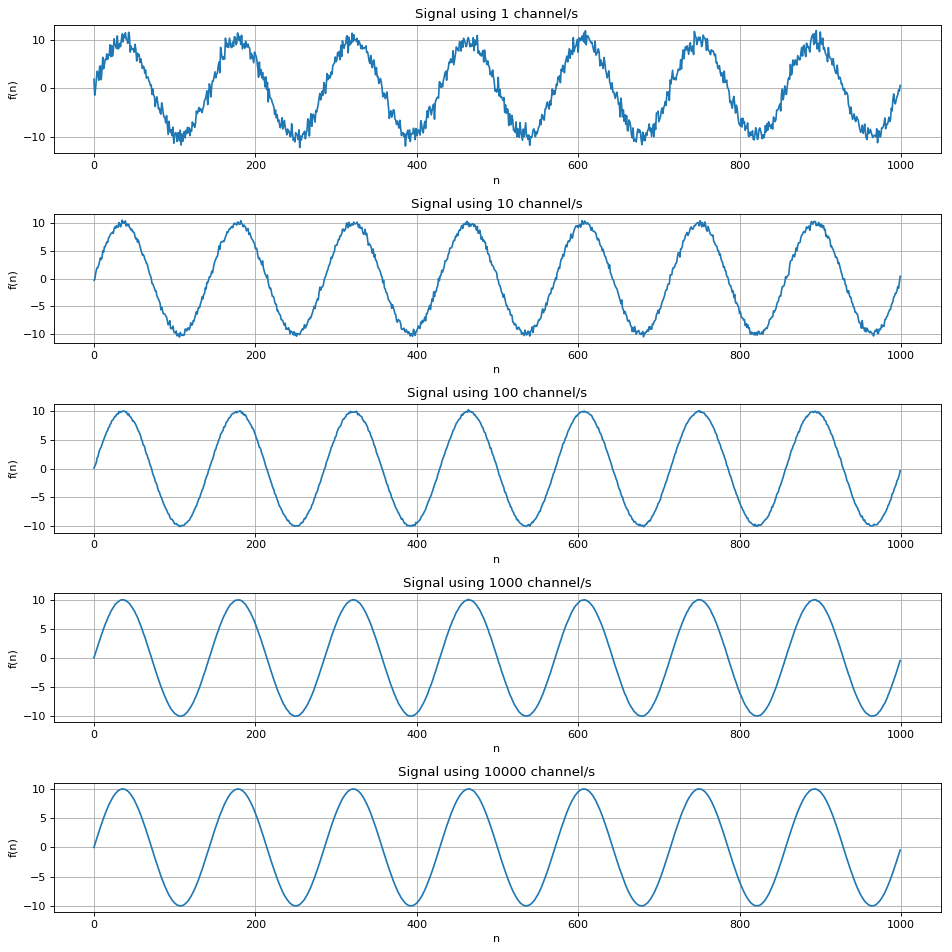

In [3]:
sm=np.zeros((N,1))
smNoise=np.zeros((N,1))
stds=[]
plt.figure(1,figsize=(12, 12), dpi=80)
kfig=510
for i in range(0,10000):
  xk,desc1=harm(A,f,dt,N)
  noise=getRandomND(N)
  
  xk_noise=xk+noise
  sm+=xk_noise
  smNoise+=noise
  std=(smNoise/(i+1)).std()
  stds.append(std)
  if i in [0,9,99,999,9999]:
        kfig=kfig+1
        plt.subplot(kfig)
        curr=sm/(i+1)
        plotVector(curr,"Signal using {} channel/s".format(i+1),"n","f(n)")
        print "std {} = {}".format(i+1,std)
plt.tight_layout()
plt.show()

### Notice and compare

Since the standard deviation of shot noise is equal to the square root of the average number of events N, the signal-to-noise ratio (SNR) is given by:

$SNR=\sqrt{N}$

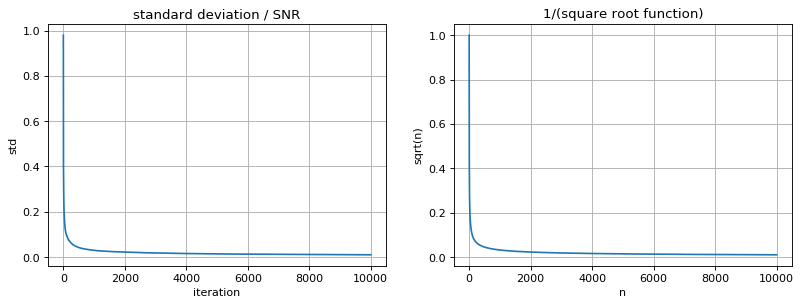

In [4]:
sq=1/np.sqrt(np.arange(1,10000))
plt.figure(3,figsize=(12, 4), dpi=80)
plt.subplot(121)
plotVector(stds,"standard deviation / SNR","iteration","std")
plt.subplot(122)
plotVector(sq,"1/(square root function)","n","sqrt(n)")
plt.show()

$S(k,w)=\sum_{i=0}^{w-1}X_{k+i}$

plot 

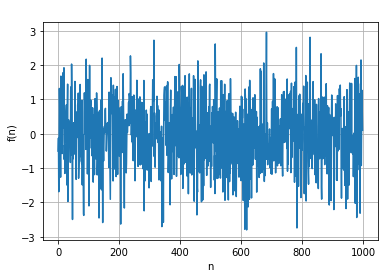

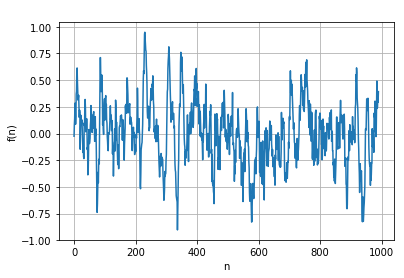

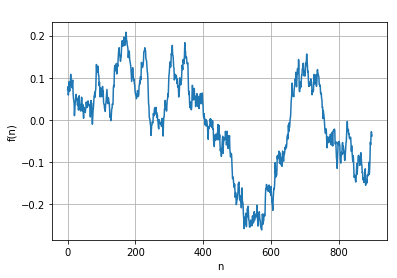

In [5]:
def singleStep(X,w,k):
    return X[k:k+w].mean()
def allSteps(X,w):
    N=X.shape[0]
    return np.array([singleStep(X,w,k) for k in range(N-w)])
for i in [1,10,100]:
  ans=allSteps(noise,i)
  plotVector(ans," ","n","f(n)")
  plt.show()